In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation


In [2]:
res = np.load("LR_50fCV.npy", allow_pickle=True).item()


In [3]:
mat = np.empty((len(res.keys()), 50))
for i,key in enumerate(res.keys()):
    
    mat[i] = res[key]['rmse']

In [4]:
df = pd.DataFrame(mat, index=res.keys())

In [5]:
df.mean(axis=1)

0.1-0.9      12.597725
0.18-0.82    12.550967
0.25-0.75    12.536025
0.5-0.5      12.503127
0.75-0.25    12.456870
0.9-0.1      12.471870
dtype: float64

In [6]:
#df = pd.read_csv("CV_50-fold_results.tsv", index_col=0, sep='\t')

values = []
labels = []
for fold in df.index.values:
    values += [df.loc[fold].values]
    labels += [len(df.loc[fold].values)*[fold]]

values = np.hstack(values)
labels = np.hstack(labels)

final = np.vstack([values, labels])
plot_df = pd.DataFrame(final.T, columns = ['rmse', 'split'])

plot_df['split'] = plot_df['split'].astype(str)
plot_df['rmse'] = plot_df['rmse'].astype(float).apply(np.log2)

['0.1-0.9', '0.18-0.82', '0.25-0.75', '0.5-0.5', '0.75-0.25', '0.9-0.1']
0.1-0.9 v.s. 0.18-0.82: t-test independent samples, P_val=9.621e-05 stat=4.067e+00
0.18-0.82 v.s. 0.25-0.75: t-test independent samples, P_val=2.766e-01 stat=1.094e+00
0.25-0.75 v.s. 0.5-0.5: t-test independent samples, P_val=9.864e-02 stat=1.667e+00
0.5-0.5 v.s. 0.75-0.25: t-test independent samples, P_val=1.203e-01 stat=1.567e+00
0.75-0.25 v.s. 0.9-0.1: t-test independent samples, P_val=7.769e-01 stat=-2.841e-01


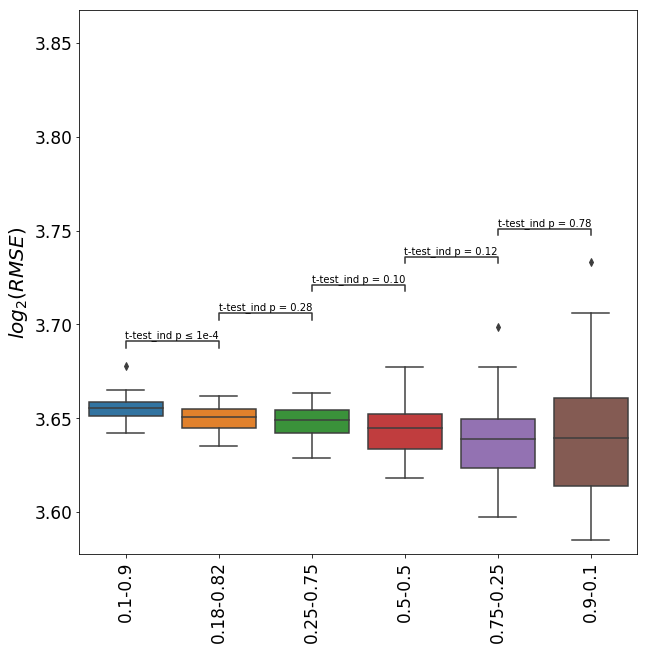

In [7]:
plt.figure(figsize=(10,10))
all_splits = []
split_labels = []

for split in np.unique(plot_df.split.values):
    split_labels += [split]
    all_splits += [df.loc[split].values]
print(split_labels)
ax = sns.boxplot(x="split", y="rmse", data=plot_df)
test_results = add_stat_annotation(ax, data=plot_df, x="split", y="rmse", order=split_labels,
                                   box_pairs=[('0.1-0.9', '0.18-0.82'),
                                              ('0.18-0.82', '0.25-0.75'), ('0.25-0.75', '0.5-0.5'),('0.5-0.5', '0.75-0.25'),
                                             ('0.75-0.25','0.9-0.1')],
                                   test='t-test_ind', text_format="simple",loc='inside', verbose=2)

plt.ylabel(r"$log_2(RMSE)$", fontsize=20)
plt.xlabel("")
plt.xticks(np.arange(0,len(all_splits)), split_labels, fontsize=17, rotation=90)
plt.yticks(fontsize=17)

plt.savefig("../plots/LR_DNA_50-fold.png", dpi=600)
plt.show()